In [1]:
import pandas as pd

In [6]:
df = pd.read_csv('feedback_week1.csv').iloc[:,0:1]

In [7]:
df.isnull().sum()

Feedback    0
dtype: int64

In [8]:
import nltk

In [9]:
df['Feedback'] =df['Feedback'].astype(str)

### Data Cleanup process

In [10]:
#lower case
df['Feedback'] = df['Feedback'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [11]:
## remove punctuation
df['Feedback'] = df['Feedback'].str.replace('[^\w\s]','')

In [12]:
## remove stopwords

from nltk.corpus import stopwords
stop = stopwords.words('english')
df['Feedback'] = df['Feedback'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [13]:
#special character
df['Feedback'] = df['Feedback'].str.replace('[^\w\s]','')

In [14]:
#remove new line
df = df.replace('\n','', regex=True)

In [15]:
## regular expression cleanup
import re

REPLACE_NO_SPACE = re.compile("[.;:!\'?,\"()\[\]]")
REPLACE_WITH_SPACE = re.compile("(<br\s*/><br\s*/>)|(\-)|(\/)")
DIGIT_REMOVE = re.compile(r"(^|\W)\d+")
NEW_LINE_REMOVE = re.compile("\n")


def preprocess_reviews(reviews):
    reviews = [REPLACE_NO_SPACE.sub("", line.lower()) for line in reviews]
    reviews = [REPLACE_WITH_SPACE.sub(" ", line) for line in reviews]
    reviews = [DIGIT_REMOVE.sub("", line) for line in reviews]
    
    return reviews

df['Feedback'] = preprocess_reviews(df['Feedback'])

In [16]:
#### Lemmatization

In [17]:
def get_lemmatized_text(corpus):
    from nltk.stem import WordNetLemmatizer
    lemmatizer = WordNetLemmatizer()
    return [' '.join([lemmatizer.lemmatize(word) for word in review.split()]) for review in corpus]

df['Feedback'] = get_lemmatized_text(df['Feedback'])

In [18]:
### stemming

In [19]:
# st = PorterStemmer()
# df['reviews.text'] = df['reviews.text'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))


### Frequently used words

In [20]:

most = pd.Series(' '.join(df['Feedback']).split()).value_counts()[:10]
most

week           47
content        46
hci            36
course         28
learning       28
interesting    26
system         25
video          23
good           21
really         21
dtype: int64

### Word cloud

In [21]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

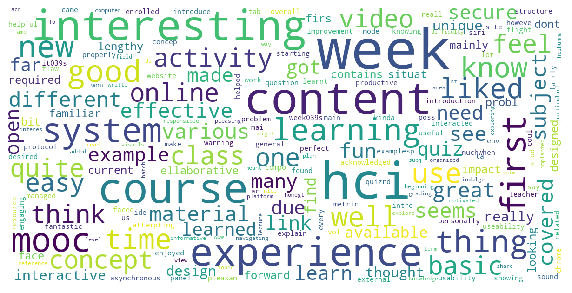

In [22]:
def show_wordcloud(col, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=500,
        max_font_size=40, 
        scale=3,
        random_state=1
    ).generate(str(col))

    fig = plt.figure(1, figsize=(10, 10))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=10)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()


if __name__ == '__main__':
    show_wordcloud(df['Feedback'])
#     show_wordcloud(df['review'])

## Adjectives used

In [23]:
feelings = []
for sentence in df['Feedback']:
    # each sentence is either a list of words or a list of (word, POS tag) tuples
    for word, pos in nltk.pos_tag(sentence.split()): # remove the call to nltk.pos_tag if `sentence` is a list of tuples as described above
        if pos in ['JJR', "JJ", "JJS"]: # feel free to add any other noun tags
            feelings.append(word)

In [24]:
most = pd.Series(' '.join(feelings).split()).value_counts()[:10]
most

good           18
content        15
first          11
interesting    11
helpful        10
different       9
new             9
easy            8
many            8
great           7
dtype: int64

### Sentiment scoring

In [25]:
import pandas as pd
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

#load in the sentiment analyzer
sia=SentimentIntensityAnalyzer()

#apply the analyzer over each comment
df['polairty scores'] =df['Feedback'].apply(lambda x: sia.polarity_scores(x)['compound'])

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/bibhuti/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [26]:
def sentiment(score):
    if score<0 :
        return "Negative"
    elif score<=0.5:
        return "Neutral"
    elif score>0.5:
        return "Positive"
    

In [27]:
sentiment_list=[]
for a in df['polairty scores']:
    sentiment_list.append(sentiment(a))
df['Sentiment']=sentiment_list

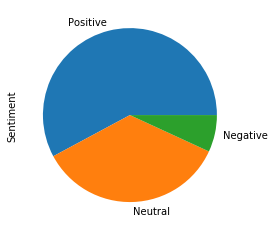

In [28]:
df['Sentiment'].value_counts().plot(kind="pie")
plt.show()

In [29]:
df_positive=df[df.Sentiment=='Positive']
df_negative=df[df.Sentiment=='Negative']

In [30]:
def feelings_func(df):
    feelings = []
    for sentence in df['Feedback']:
        # each sentence is either a list of words or a list of (word, POS tag) tuples
        for word, pos in nltk.pos_tag(sentence.split()): # remove the call to nltk.pos_tag if `sentence` is a list of tuples as described above
            if pos in ["JJ"]: # feel free to add any other noun tags
                feelings.append(word)
    return feelings

In [31]:
postive_feeling = feelings_func(df_positive)
negative_feeling = feelings_func(df_negative)
all_feeling = feelings_func(df)

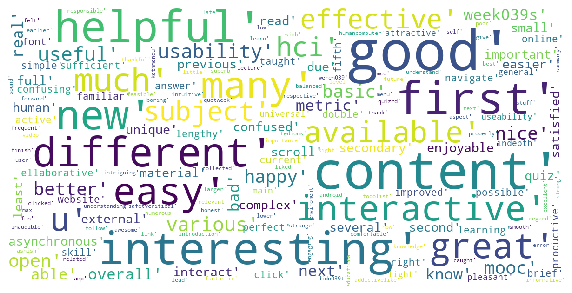

In [32]:
show_wordcloud(feelings)

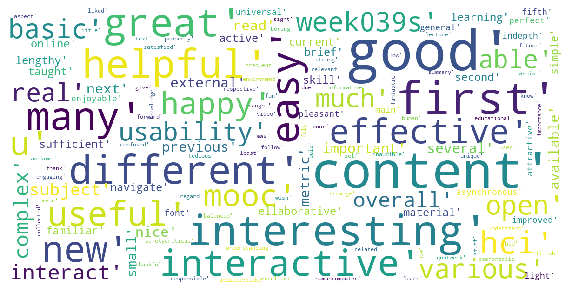

In [33]:
show_wordcloud(postive_feeling)

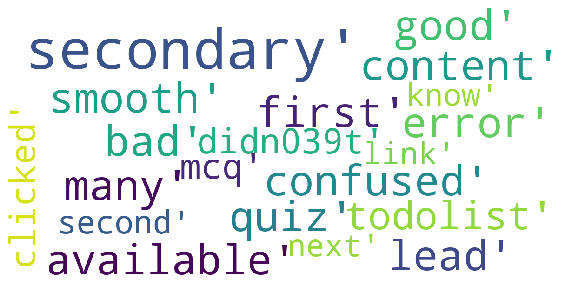

In [34]:
show_wordcloud(negative_feeling)

In [35]:
df.to_csv('review_analysis.csv',index=False)